<a href="https://colab.research.google.com/github/sumandroid/EIP_SESSION_2/blob/master/Ninth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


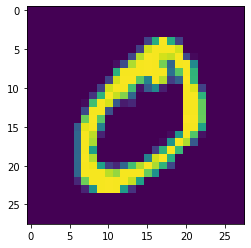

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(14, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(28, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(14, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(14, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(14, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(14, 3, 3, activation='relu'))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(28, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 14)        140       
_________________________________________________________________
batch_normalization_17 (Batc (None, 26, 26, 14)        56        
_________________________________________________________________
dropout_17 (Dropout)         (None, 26, 26, 14)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 28)        3556      
_________________________________________________________________
batch_normalization_18 (Batc (None, 24, 24, 28)        112       
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 24, 28)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 10)       

In [15]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.002 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.002.
60000/60000 [==============================] - 13s 223us/step - loss: 0.6263 - acc: 0.8289 - val_loss: 0.1332 - val_acc: 0.9817
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0015163002.
60000/60000 [==============================] - 9s 145us/step - loss: 0.3123 - acc: 0.9074 - val_loss: 0.0802 - val_acc: 0.9865
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0012210012.
60000/60000 [==============================] - 8s 140us/step - loss: 0.2479 - acc: 0.9282 - val_loss: 0.0594 - val_acc: 0.9875
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0010219724.
60000/60000 [==============================] - 8s 132us/step - loss: 0.2117 - acc: 0.9381 - val_loss: 0.0471 - val_acc: 0.9910
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0008787346.
60000/60000 [=====

In [16]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.020681965337414294, 0.9947]
